In [2]:
import pandas as pd

In [4]:
df_noway_kr = pd.read_parquet(path=r"C:\Users\AaronWork\Projects\LoLTracker\apps\data\NowayKR.parquet")
# df_noway_euw = pd.read_parquet(path=r"C:\Users\AaronWork\Projects\LoLTracker\apps\data\NowayEUW.parquet")
df = pd.read_parquet(path=r"C:\Users\AaronWork\Projects\LoLTracker\apps\data\test_data.parquet")

In [5]:
pd.set_option('display.max_rows', 15)
pd.set_option('display.max_columns', None)
# pd.reset_option('display.max_rows')
# pd.reset_option('display.max_columns')

In [6]:
df_noway_kr.shape

(20, 53)

In [7]:
df_noway_kr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, KR_6807587968 to KR_6806109349
Data columns (total 53 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   gameCreation                    20 non-null     datetime64[ns]
 1   gameEndTimestamp                20 non-null     datetime64[ns]
 2   gameDuration                    20 non-null     int64         
 3   gameVersion                     20 non-null     object        
 4   laneOpponent                    20 non-null     object        
 5   gameDuration_m_s                20 non-null     object        
 6   totalAllyTeamKills              20 non-null     int64         
 7   totalAllyTeamDeaths             20 non-null     int64         
 8   Maxi                            20 non-null     bool          
 9   Moritz                          20 non-null     bool          
 10  Niclas                          20 non-null     bool      

In [73]:
df_noway_kr

,gameCreation,gameEndTimestamp,gameDuration,gameVersion,laneOpponent,gameDuration_m_s,totalAllyTeamKills,totalAllyTeamDeaths,Maxi,Moritz,Niclas,Aaron,kills,deaths,assists,championName,firstBloodAssist,firstBloodKill,firstTowerAssist,firstTowerKill,gameEndedInEarlySurrender,gameEndedInSurrender,goldEarned,magicDamageDealtToChampions,physicalDamageDealtToChampions,teamEarlySurrendered,teamPosition,totalDamageDealtToChampions,wardsKilled,wardsPlaced,win,teamId,allyTopPick,allyJunglePick,allyMiddlePick,allyBottomPick,allySupportPick,enemyTopPick,enemyJunglePick,enemyMiddlePick,enemyBottomPick,enemySupportPick,allyTopBan,allyJungleBan,allyMiddleBan,allyBottomBan,allySupportBan,enemyTopBan,enemyJungleBan,enemyMiddleBan,enemyBottomBan,enemySupportBan,onBlueSide
matchId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
KR_6806211091,2023-11-19 23:40:18,2023-11-20 00:05:01,1473,13.22,Orianna,24:33,23,25,False,False,False,False,2,5,7,Ziggs,False,False,False,False,False,False,10257,14899,1075,False,MIDDLE,16019,3,9,True,100,Fiora,Gwen,Ziggs,Jinx,Pyke,Rengar,LeeSin,Orianna,Twitch,Yuumi,Nidalee,Akali,Blitzcrank,Draven,Rakan,Draven,Akali,Graves,Kalista,KSante,True
KR_6806197538,2023-11-19 23:06:31,2023-11-19 23:29:32,1367,13.22,Orianna,22:47,29,18,False,False,False,False,3,4,2,Yone,False,False,False,False,False,True,10503,2045,6166,False,MIDDLE,9517,4,10,True,200,Maokai,Nidalee,Yone,Tristana,Yuumi,Aatrox,LeeSin,Orianna,Caitlyn,Lux,KSante,Shaco,Akali,Draven,Kalista,Kalista,Briar,Draven,KSante,Irelia,False
KR_6806188460,2023-11-19 22:25:09,2023-11-19 23:00:55,2051,13.22,Orianna,34:11,29,22,False,False,False,False,9,3,4,Syndra,False,False,False,False,False,False,17980,24189,628,False,MIDDLE,28069,4,15,True,100,Nidalee,LeeSin,Syndra,Ezreal,Thresh,Nasus,Viego,Orianna,Sivir,Yuumi,Blitzcrank,Rumble,Ziggs,Akali,Graves,Vayne,Kalista,Akali,Blitzcrank,Draven,True
KR_6806178635,2023-11-19 21:43:47,2023-11-19 22:11:53,1675,13.22,Yone,27:55,13,27,False,False,False,False,5,4,0,Ahri,False,False,False,True,False,False,11264,13628,1533,False,MIDDLE,18889,1,11,False,100,KSante,Belveth,Ahri,Caitlyn,Ashe,Kayle,Neeko,Yone,Jinx,Milio,Fiora,Rakan,Rumble,Akali,Blitzcrank,Senna,Jax,Ziggs,Orianna,Draven,True
KR_6806169490,2023-11-19 20:44:35,2023-11-19 21:07:51,1379,13.22,Akshan,22:59,18,41,False,False,False,False,3,7,3,Jayce,False,False,False,False,False,False,8353,2856,13633,False,MIDDLE,16569,3,8,False,200,KSante,Karthus,Jayce,Kaisa,Alistar,Sylas,Nunu,Akshan,Jinx,Rakan,Blitzcrank,Jax,Nidalee,Orianna,Akali,Rumble,Rell,Pyke,Anivia,Neeko,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
KR_6802338227,2023-11-17 18:27:08,2023-11-17 18:57:23,1799,13.22,Akshan,29:59,26,43,False,False,False,False,2,7,11,Syndra,False,False,False,False,False,True,12297,24226,511,False,MIDDLE,26209,1,12,False,200,Poppy,LeeSin,Syndra,Jhin,Nautilus,Vladimir,JarvanIV,Akshan,Xayah,Blitzcrank,Tryndamere,Yone,Samira,Rumble,Senna,Thresh,KSante,Orianna,Kalista,Taliyah,False
KR_6802300416,2023-11-17 17:49:57,2023-11-17 18:19:41,1773,13.22,KSante,29:33,34,41,False,False,False,False,8,8,5,Gragas,False,False,False,False,False,False,12134,25104,1726,False,TOP,26850,1,12,False,100,Gragas,Graves,Yasuo,Ezreal,Nautilus,KSante,Brand,Tryndamere,Varus,Karma,Leblanc,Blitzcrank,Draven,Yone,Aatrox,Akali,Kalista,Ziggs,NoBan,Nidalee,True
KR_6802262157,2023-11-17 17:13:29,2023-11-17 17:44:10,1828,13.22,TwistedFate,30:28,38,30,False,False,False,False,9,5,10,Viktor,False,False,False,False,False,True,13909,38172,491,False,MIDDLE,38663,1,12,True,100,Fiora,LeeSin,Viktor,Varus,Senna,Rumble,Vi,TwistedFate,Nilah,Zilean,Neeko,NoBan,Kennen,Akali,Kalista,Ashe,Ziggs,Sylas,Kalista,Graves,True


#### Game Duration in Minutes Bar Chart with Bins

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def game_duration_in_minutes_bar_chart(df: pd.DataFrame, bin_size=4):
    minutes_df = df["gameDuration_m_s"].apply(lambda x: int(x.split(":")[0]))

    min = minutes_df.min()
    min_bin = min if min % 2 == 0 else min - 1

    max = minutes_df.max()
    max_bin = max if max % 2 == 0 else max + 1

    bin_size = 4

    bin_edges = [x for x in range(min_bin, max_bin, bin_size)]

    hist, edges = np.histogram(minutes_df, bins=bin_edges)

    plt.bar(edges[:-1], hist, width=edges[1]-edges[0] - 0.1, color='blue', align='edge')

    plt.xlabel(f'Bins of size: {bin_size}')
    plt.ylabel('Frequency')
    plt.title(f'Game duration in minutes')

    plt.show()

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def game_duration_in_minutes_bar_chart(dataframes, names, bin_size=4):
    fig, axs = plt.subplots(1, len(dataframes), figsize=(12, 5))  # Adjust the figsize as needed

    for i, df in enumerate(dataframes):
        minutes_df = df["gameDuration_m_s"].apply(lambda x: int(x.split(":")[0]))

        min_val = minutes_df.min()
        min_bin = min_val if min_val % 2 == 0 else min_val - 1

        max_val = minutes_df.max()
        max_bin = max_val if max_val % 2 == 0 else max_val + 1

        bin_edges = [x for x in range(0, 60, bin_size)]

        hist, edges = np.histogram(minutes_df, bins=bin_edges)

        axs[i].bar(edges[:-1], hist, width=edges[1]-edges[0] - 0.2, color='blue', align='edge')

        axs[i].set_xlabel(f'Bins of size: {bin_size}')
        axs[i].set_ylabel('Frequency')
        axs[i].set_title(f'Game duration in minutes - Dataset: Noway {names[i]}')

        axs[i].set_ylim(0, 100)

    plt.tight_layout()
    plt.show()

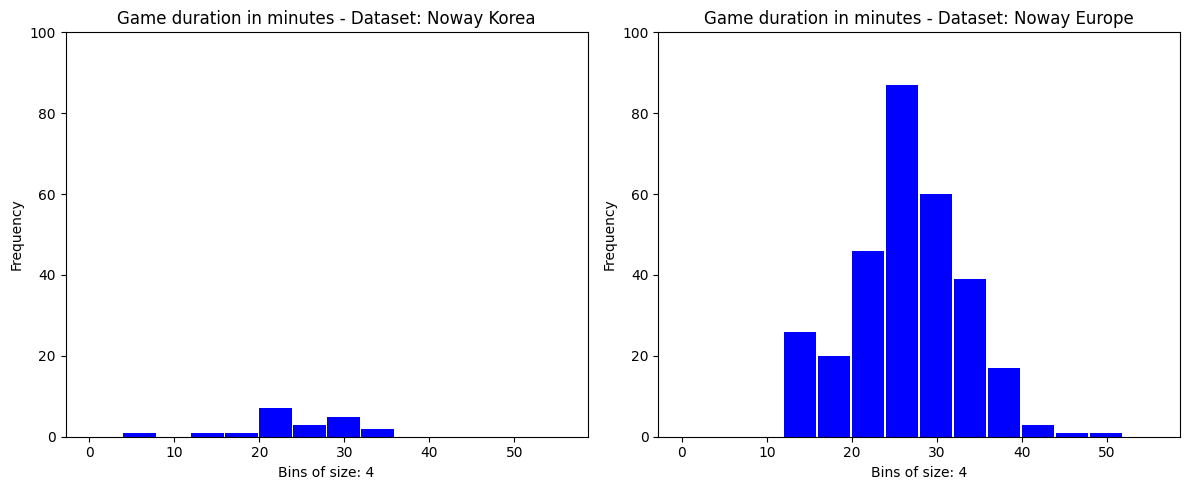

In [76]:
game_duration_in_minutes_bar_chart([df_noway_kr, df_noway_euw], ["Korea", "Europe"])

#### 5 Most played Champions -> Matchups (count, winrate)

In [77]:
most_played_champion = df_noway_kr["championName"].value_counts().head(1).index[0]

filt_games = df_noway_kr["championName"] == most_played_champion
filt_wins = (df_noway_kr["championName"] == most_played_champion) & (df_noway_kr["win"] == True)

match_up_counts_series = pd.Series(df_noway_kr.loc[filt_games, "laneOpponent"].value_counts().head(10), name="Games")
match_up_wins_series = pd.Series(df_noway_kr.loc[filt_wins, "laneOpponent"].value_counts().head(10), name="Wins")
merged_series = pd.concat([match_up_counts_series, match_up_wins_series], axis="columns")
merged_series.fillna(0, inplace=True)
merged_series["Winrate"] = merged_series["Wins"] / merged_series["Games"] * 100

In [78]:
# df_noway_kr.set_index("matchId", inplace=True)
df_noway_kr['gameCreation'].max() - df_noway_kr['gameCreation'].min()


df_noway_kr.set_index('gameCreation', inplace=True)
df_noway_kr

,gameEndTimestamp,gameDuration,gameVersion,laneOpponent,gameDuration_m_s,totalAllyTeamKills,totalAllyTeamDeaths,Maxi,Moritz,Niclas,Aaron,kills,deaths,assists,championName,firstBloodAssist,firstBloodKill,firstTowerAssist,firstTowerKill,gameEndedInEarlySurrender,gameEndedInSurrender,goldEarned,magicDamageDealtToChampions,physicalDamageDealtToChampions,teamEarlySurrendered,teamPosition,totalDamageDealtToChampions,wardsKilled,wardsPlaced,win,teamId,allyTopPick,allyJunglePick,allyMiddlePick,allyBottomPick,allySupportPick,enemyTopPick,enemyJunglePick,enemyMiddlePick,enemyBottomPick,enemySupportPick,allyTopBan,allyJungleBan,allyMiddleBan,allyBottomBan,allySupportBan,enemyTopBan,enemyJungleBan,enemyMiddleBan,enemyBottomBan,enemySupportBan,onBlueSide
gameCreation,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2023-11-19 23:40:18,2023-11-20 00:05:01,1473,13.22,Orianna,24:33,23,25,False,False,False,False,2,5,7,Ziggs,False,False,False,False,False,False,10257,14899,1075,False,MIDDLE,16019,3,9,True,100,Fiora,Gwen,Ziggs,Jinx,Pyke,Rengar,LeeSin,Orianna,Twitch,Yuumi,Nidalee,Akali,Blitzcrank,Draven,Rakan,Draven,Akali,Graves,Kalista,KSante,True
2023-11-19 23:06:31,2023-11-19 23:29:32,1367,13.22,Orianna,22:47,29,18,False,False,False,False,3,4,2,Yone,False,False,False,False,False,True,10503,2045,6166,False,MIDDLE,9517,4,10,True,200,Maokai,Nidalee,Yone,Tristana,Yuumi,Aatrox,LeeSin,Orianna,Caitlyn,Lux,KSante,Shaco,Akali,Draven,Kalista,Kalista,Briar,Draven,KSante,Irelia,False
2023-11-19 22:25:09,2023-11-19 23:00:55,2051,13.22,Orianna,34:11,29,22,False,False,False,False,9,3,4,Syndra,False,False,False,False,False,False,17980,24189,628,False,MIDDLE,28069,4,15,True,100,Nidalee,LeeSin,Syndra,Ezreal,Thresh,Nasus,Viego,Orianna,Sivir,Yuumi,Blitzcrank,Rumble,Ziggs,Akali,Graves,Vayne,Kalista,Akali,Blitzcrank,Draven,True
2023-11-19 21:43:47,2023-11-19 22:11:53,1675,13.22,Yone,27:55,13,27,False,False,False,False,5,4,0,Ahri,False,False,False,True,False,False,11264,13628,1533,False,MIDDLE,18889,1,11,False,100,KSante,Belveth,Ahri,Caitlyn,Ashe,Kayle,Neeko,Yone,Jinx,Milio,Fiora,Rakan,Rumble,Akali,Blitzcrank,Senna,Jax,Ziggs,Orianna,Draven,True
2023-11-19 20:44:35,2023-11-19 21:07:51,1379,13.22,Akshan,22:59,18,41,False,False,False,False,3,7,3,Jayce,False,False,False,False,False,False,8353,2856,13633,False,MIDDLE,16569,3,8,False,200,KSante,Karthus,Jayce,Kaisa,Alistar,Sylas,Nunu,Akshan,Jinx,Rakan,Blitzcrank,Jax,Nidalee,Orianna,Akali,Rumble,Rell,Pyke,Anivia,Neeko,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-17 18:27:08,2023-11-17 18:57:23,1799,13.22,Akshan,29:59,26,43,False,False,False,False,2,7,11,Syndra,False,False,False,False,False,True,12297,24226,511,False,MIDDLE,26209,1,12,False,200,Poppy,LeeSin,Syndra,Jhin,Nautilus,Vladimir,JarvanIV,Akshan,Xayah,Blitzcrank,Tryndamere,Yone,Samira,Rumble,Senna,Thresh,KSante,Orianna,Kalista,Taliyah,False
2023-11-17 17:49:57,2023-11-17 18:19:41,1773,13.22,KSante,29:33,34,41,False,False,False,False,8,8,5,Gragas,False,False,False,False,False,False,12134,25104,1726,False,TOP,26850,1,12,False,100,Gragas,Graves,Yasuo,Ezreal,Nautilus,KSante,Brand,Tryndamere,Varus,Karma,Leblanc,Blitzcrank,Draven,Yone,Aatrox,Akali,Kalista,Ziggs,NoBan,Nidalee,True
2023-11-17 17:13:29,2023-11-17 17:44:10,1828,13.22,TwistedFate,30:28,38,30,False,False,False,False,9,5,10,Viktor,False,False,False,False,False,True,13909,38172,491,False,MIDDLE,38663,1,12,True,100,Fiora,LeeSin,Viktor,Varus,Senna,Rumble,Vi,TwistedFate,Nilah,Zilean,Neeko,NoBan,Kennen,Akali,Kalista,Ashe,Ziggs,Sylas,Kalista,Graves,True


c:\Users\AaronWork\Projects\loltracker\venv\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1409: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)


<Axes: xlabel='gameCreation'>

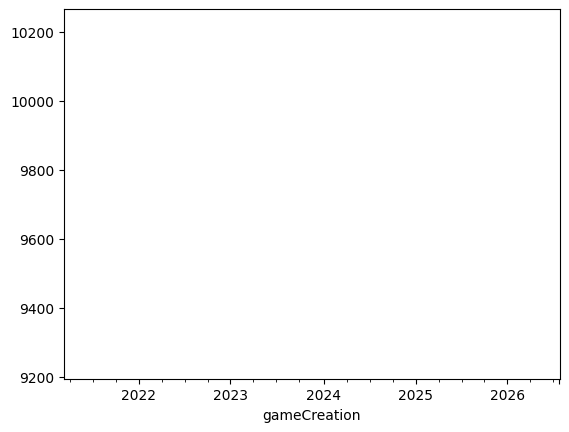

In [79]:
df_2019 = df_noway_kr["goldEarned"].resample("W").mean()
df_2019.plot()

In [80]:
df_noway_kr.head()

,gameEndTimestamp,gameDuration,gameVersion,laneOpponent,gameDuration_m_s,totalAllyTeamKills,totalAllyTeamDeaths,Maxi,Moritz,Niclas,Aaron,kills,deaths,assists,championName,firstBloodAssist,firstBloodKill,firstTowerAssist,firstTowerKill,gameEndedInEarlySurrender,gameEndedInSurrender,goldEarned,magicDamageDealtToChampions,physicalDamageDealtToChampions,teamEarlySurrendered,teamPosition,totalDamageDealtToChampions,wardsKilled,wardsPlaced,win,teamId,allyTopPick,allyJunglePick,allyMiddlePick,allyBottomPick,allySupportPick,enemyTopPick,enemyJunglePick,enemyMiddlePick,enemyBottomPick,enemySupportPick,allyTopBan,allyJungleBan,allyMiddleBan,allyBottomBan,allySupportBan,enemyTopBan,enemyJungleBan,enemyMiddleBan,enemyBottomBan,enemySupportBan,onBlueSide
gameCreation,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2023-11-19 23:40:18,2023-11-20 00:05:01,1473,13.22,Orianna,24:33,23,25,False,False,False,False,2,5,7,Ziggs,False,False,False,False,False,False,10257,14899,1075,False,MIDDLE,16019,3,9,True,100,Fiora,Gwen,Ziggs,Jinx,Pyke,Rengar,LeeSin,Orianna,Twitch,Yuumi,Nidalee,Akali,Blitzcrank,Draven,Rakan,Draven,Akali,Graves,Kalista,KSante,True
2023-11-19 23:06:31,2023-11-19 23:29:32,1367,13.22,Orianna,22:47,29,18,False,False,False,False,3,4,2,Yone,False,False,False,False,False,True,10503,2045,6166,False,MIDDLE,9517,4,10,True,200,Maokai,Nidalee,Yone,Tristana,Yuumi,Aatrox,LeeSin,Orianna,Caitlyn,Lux,KSante,Shaco,Akali,Draven,Kalista,Kalista,Briar,Draven,KSante,Irelia,False
2023-11-19 22:25:09,2023-11-19 23:00:55,2051,13.22,Orianna,34:11,29,22,False,False,False,False,9,3,4,Syndra,False,False,False,False,False,False,17980,24189,628,False,MIDDLE,28069,4,15,True,100,Nidalee,LeeSin,Syndra,Ezreal,Thresh,Nasus,Viego,Orianna,Sivir,Yuumi,Blitzcrank,Rumble,Ziggs,Akali,Graves,Vayne,Kalista,Akali,Blitzcrank,Draven,True
2023-11-19 21:43:47,2023-11-19 22:11:53,1675,13.22,Yone,27:55,13,27,False,False,False,False,5,4,0,Ahri,False,False,False,True,False,False,11264,13628,1533,False,MIDDLE,18889,1,11,False,100,KSante,Belveth,Ahri,Caitlyn,Ashe,Kayle,Neeko,Yone,Jinx,Milio,Fiora,Rakan,Rumble,Akali,Blitzcrank,Senna,Jax,Ziggs,Orianna,Draven,True
2023-11-19 20:44:35,2023-11-19 21:07:51,1379,13.22,Akshan,22:59,18,41,False,False,False,False,3,7,3,Jayce,False,False,False,False,False,False,8353,2856,13633,False,MIDDLE,16569,3,8,False,200,KSante,Karthus,Jayce,Kaisa,Alistar,Sylas,Nunu,Akshan,Jinx,Rakan,Blitzcrank,Jax,Nidalee,Orianna,Akali,Rumble,Rell,Pyke,Anivia,Neeko,False


In [81]:
games = df_noway_kr["championName"].value_counts()
stats = df_noway_kr.groupby("championName").agg({"win": "sum", "kills": "mean", "deaths": "mean", "assists": "mean"})

op_gg = pd.concat([games, stats], axis="columns")
op_gg["winrate"] = op_gg["win"] / op_gg["count"] * 100
op_gg

,count,win,kills,deaths,assists,winrate
championName,,,,,,
Syndra,6,4,6.333333,4.833333,6.0,66.666667
Alistar,3,2,1.666667,6.000000,16.0,66.666667
Ahri,2,0,2.500000,2.000000,1.0,0.000000
Jayce,2,0,2.500000,7.500000,2.0,0.000000
Ziggs,1,1,2.000000,5.000000,7.0,100.000000
Yone,1,1,3.000000,4.000000,2.0,100.000000
Senna,1,0,0.000000,9.000000,3.0,0.000000
Orianna,1,1,2.000000,2.000000,4.0,100.000000
Xerath,1,1,5.000000,5.000000,2.0,100.000000


<Axes: xlabel='teamPosition', ylabel='Percentage %'>

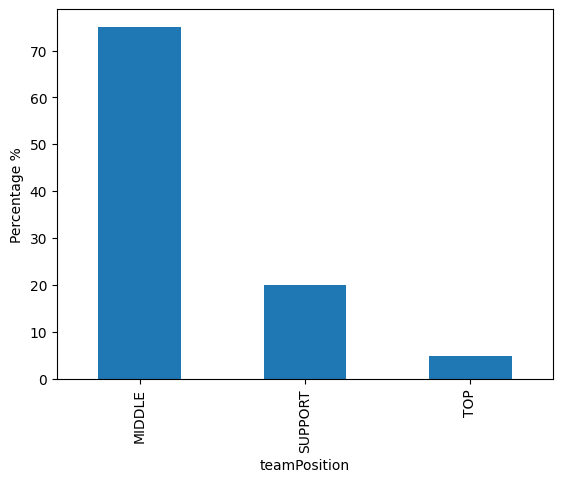

In [82]:
df_noway_kr["teamPosition"].value_counts(normalize=True).mul(100).plot(kind="bar", ylabel="Percentage %")

<Axes: xlabel='teamPosition', ylabel='Percentage %'>

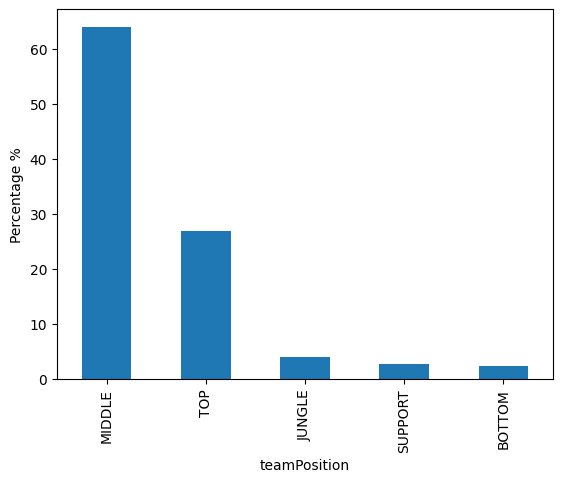

In [83]:
df_noway_euw["teamPosition"].value_counts(normalize=True).mul(100).plot(kind="bar", ylabel="Percentage %")

<Axes: xlabel='games', ylabel='winrate'>

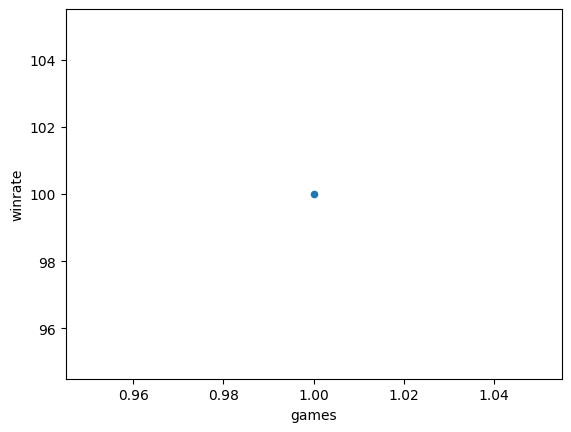

In [84]:
pd.set_option('display.max_rows', None)

df_noway_kr["games"] = 1
df_noway_kr.head()

blue_side = df_noway_kr["championName"] == "Orianna"

# match_ups = df_noway_kr.loc[filt,["championName", "laneOpponent"]].value_counts(normalize=True)
ori_wins = df_noway_kr.loc[blue_side, ["championName", "laneOpponent", "games", "win"]].groupby("laneOpponent").agg({"games": "sum", "win": "sum"}).sort_values("win", ascending=False)

ori_wins["winrate"] = ori_wins["win"] / ori_wins["games"] * 100
ori_wins.drop("win", axis="columns")
ori_wins.plot(kind="scatter", x="games", y="winrate")

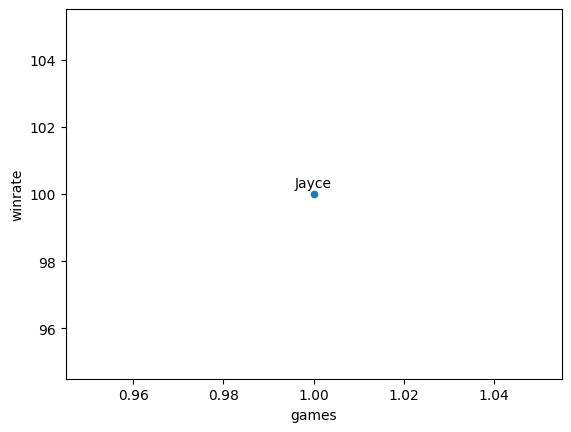

In [85]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a scatter plot and label points with their index
ax = ori_wins.plot(kind="scatter", x="games", y="winrate")

# Annotate each point with its index
for label, x, y in zip(ori_wins.index, ori_wins['games'], ori_wins['winrate']):
    ax.annotate(label, (x, y), textcoords="offset points", xytext=(0,5), ha='center')

plt.show()


In [86]:
blue_side = (df_noway_kr["championName"] == "Orianna") & (df_noway_kr["laneOpponent"] == "Akali")
df_noway_kr.loc[blue_side, ["championName", "laneOpponent", "win"]].shape[0]

0

#### Worst Lane Opponent

In [87]:
lane_opponent_wins = pd.Series(df_noway_kr.groupby("laneOpponent")["win"].sum().sort_values(ascending=False), name="Wins")
lane_opponent_wins.head()

laneOpponent
Orianna    4
Jayce      2
Gragas     1
Neeko      1
Rell       1
Name: Wins, dtype: int64

In [88]:
lane_opponent_games = pd.Series(df_noway_kr.groupby("laneOpponent").size(), name="Games")
lane_opponent_games.head()

laneOpponent
Akshan    2
Gragas    1
Irelia    1
Jayce     2
KSante    1
Name: Games, dtype: int64

In [89]:
lane_opponent = pd.concat([lane_opponent_games, lane_opponent_wins], axis="columns")
lane_opponent["Winrate"] = lane_opponent["Wins"] / lane_opponent["Games"] * 100
lane_opponent.sort_values(by="Games", ascending=False)

blue_side = (lane_opponent["Games"] > 10) & (lane_opponent["Winrate"] < 50)
lane_opponent.loc[blue_side]

,Games,Wins,Winrate
laneOpponent,,,


#### Worst overall champion in enemy team

In [90]:
blue_side = ["bluePickTop", "bluePickJungle", "bluePickMiddle", "bluePickBottom", "bluePickSupport"]
red_side = ["redPickTop", "redPickJungle", "redPickMiddle", "redPickBottom", "redPickSupport"]

* red side enemy champions

In [91]:
blue_side = df_noway_kr["teamId"] == 100
enemy_on_red_side = df_noway_kr.loc[blue_side, red_side + ["win"]]
enemy_on_red_side.head()

KeyError: "['redPickTop', 'redPickJungle', 'redPickMiddle', 'redPickBottom', 'redPickSupport'] not in index"

In [ ]:
red_side_enemy_champion_games = pd.Series(enemy_on_red_side[red_side].stack().value_counts(), name="Games")
red_side_enemy_champion_games.head()

In [ ]:
blue_side = enemy_on_red_side["win"]
enemy_wins = pd.Series(enemy_on_red_side.loc[blue_side][red_side].stack().value_counts(), name="Wins")

In [ ]:
red_side_pick_wr = pd.concat([red_side_enemy_champion_games, enemy_wins], axis="columns")
red_side_pick_wr["Winrate"] = red_side_pick_wr["Wins"] / red_side_pick_wr["Games"] * 100
# red_side_pick_wr.sort_values("Winrate", ascending=False)

blue_side = (red_side_pick_wr["Games"] > 10) & (red_side_pick_wr["Winrate"] < 40)
red_side_pick_wr.loc[blue_side]

* blue side enemy champions

In [ ]:
blue_side = df_noway_kr["teamId"] == 200
enemy_on_blue_side = df_noway_kr.loc[blue_side, blue_side + ["win"]]
enemy_on_blue_side.head()

In [ ]:
blue_side = enemy_on_blue_side["win"] == False
loses = enemy_on_blue_side.loc[blue_side].stack().value_counts()["Jax"]

blue_side = enemy_on_blue_side["win"] == True
wins = enemy_on_blue_side.loc[blue_side].stack().value_counts()["Jax"]

loses, wins

In [ ]:
blue_side = enemy_on_red_side["win"] == False
loses = enemy_on_red_side.loc[blue_side].stack().value_counts()["Jax"]

blue_side = enemy_on_red_side["win"] == True
wins = enemy_on_red_side.loc[blue_side].stack().value_counts()["Jax"]

loses, wins

In [ ]:
blue_side = ["bluePickTop", "bluePickJungle", "bluePickMiddle", "bluePickBottom", "bluePickSupport"]
red_side = ["redPickTop", "redPickJungle", "redPickMiddle", "redPickBottom", "redPickSupport"]

blue_side = df_noway_kr["teamId"] == 100
enemy_on_red_side = df_noway_kr.loc[blue_side, red_side + ["win"]]
blue_side = enemy_on_red_side["win"] == False
for _, value in enemy_on_red_side.loc[blue_side][red_side].iterrows():
    print(value.values)
    break

In [ ]:
# df_noway_kr["onBlueSide"] = df_noway_kr["teamId"] == 100
# df_noway_kr[["teamId", "onBlueSide"]].head(10)

In [ ]:
blue_side = df["win"]
df.loc[~blue_side, ["totalTeamKills", "totalTeamDeaths"]].mean()

In [ ]:
df[["allyTopPick", "allyJunglePick", "allyMiddlePick", "allyBottomPick", "allySupportPick"]]

In [ ]:
enemy = ["enemyTopPick", "enemyJunglePick", "enemyMiddlePick", "enemyBottomPick", "enemySupportPick"]
games = pd.Series(df_noway_kr[enemy].stack().value_counts(), name="Games")
blue_side = df_noway_kr["win"]
wins = pd.Series(df_noway_kr.loc[blue_side, enemy].stack().value_counts(), name="Wins")

enemy_champions_wr = pd.concat([games, wins], axis="columns")
enemy_champions_wr["EnemyWinrate"] = enemy_champions_wr["Wins"] / enemy_champions_wr["Games"] * 100
# enemy_champions_wr.reset_index(inplace=True)
# enemy_champions_wr.rename({"index": "ChampionName"}, inplace=True)
# enemy_champions_wr
blue_side = (enemy_champions_wr["Games"] > 20) & (enemy_champions_wr["EnemyWinrate"] > 60)
enemy_champions_wr.loc[blue_side]

enemy_champions_wr.loc["Rell", "EnemyWinrate"]
enemy_champions_wr.loc["Kalista", "EnemyWinrate"]

In [ ]:
ally = ["allyTopPick", "allyJunglePick", "allyMiddlePick", "allyBottomPick", "allySupportPick"]
games = pd.Series(df_noway_kr[ally].stack().value_counts(), name="Games")
blue_side = df_noway_kr["win"]
wins = pd.Series(df_noway_kr.loc[blue_side, ally].stack().value_counts(), name="Wins")

ally_champions_wr = pd.concat([games, wins], axis="columns")
ally_champions_wr["AllyWinrate"] = ally_champions_wr["Wins"] / ally_champions_wr["Games"] * 100
ally_champions_wr

blue_side = (ally_champions_wr["Games"] > 20) & (ally_champions_wr["AllyWinrate"] < 40)
ally_champions_wr.loc[blue_side]

In [ ]:
ally_champions_wr.loc["Yone", "AllyWinrate"] - enemy_champions_wr.loc["Yone", "EnemyWinrate"]

In [ ]:
# ally_champions_wr.reset_index(inplace=True)
# enemy_champions_wr.reset_index(inplace=True)

# pd.concat([ally_champions_wr, enemy_champions_wr])
ally_champions_wr["AllyWinrate"] - enemy_champions_wr["EnemyWinrate"].sort_values(ascending=True)

In [110]:
blue_side = df_noway_kr["onBlueSide"]
red_side =  ~blue_side
games = df_noway_kr.loc[blue_side, "win"].shape[0]
df_noway_kr.loc[blue_side, "win"]
df_noway_kr.loc[blue_side, "win"].value_counts().divide(games)

win
True     0.666667
False    0.333333
Name: count, dtype: float64